In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Libraries:

### import pandas as pd: This line imports the pandas library, a powerful tool for data manipulation and analysis in Python. It's commonly used for working with DataFrames, which are 2D table-like data structures.
### import numpy as np: This imports the NumPy library, which provides support for efficient numerical operations, arrays, and mathematical functions.
### import seaborn as sns: This imports the seaborn library, built on top of matplotlib. It offers a high-level interface for creating visually appealing and informative statistical graphics.1   


## Pandas library to read data from a CSV file named "owid-co2-data.csv" and stores it in a pandas DataFrame named df.

In [2]:
df = pd.read_csv("owid-co2-data.csv")

In [3]:
#variable column in the dataset with data types and count of the Non-Null values count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

## Total count of null values in each column

In [4]:
null_values = df.isnull().sum()
print("Print Null Values")
print(null_values)

Print Null Values
country                            0
year                               0
iso_code                        7929
population                      9172
gdp                            34940
                               ...  
temperature_change_from_n2o    12131
total_ghg                      12781
total_ghg_excluding_lucf       12955
trade_co2                      45656
trade_co2_share                45656
Length: 79, dtype: int64


In [13]:
# Missing Values of CO2 Variable
missing_value_co2 = df['co2'].isnull().sum()

missing_value_co2_percentage = (missing_value_co2/len(df))*100

print(f"missing values of 'CO2' :{missing_value_co2}")
print(f"missing_value_co2_percentage:{missing_value_co2_percentage}")


missing values of 'CO2' :21054
missing_value_co2_percentage:41.94775955848658


In [18]:
# Check the missing pattern
missing_pattern = df[df['co2'].isnull()]
print(missing_pattern[['country','year', 'co2']].head())

       country  year  co2
0  Afghanistan  1750  NaN
1  Afghanistan  1751  NaN
2  Afghanistan  1752  NaN
3  Afghanistan  1753  NaN
4  Afghanistan  1754  NaN


## List out the years which are recorded in the dataset

In [22]:
year = df['year'].nunique()
print(year)
year_display = df['year'].unique()
print(year_display)

274
[1750 1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763
 1764 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777
 1778 1779 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791
 1792 1793 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805
 1806 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819
 1820 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833
 1834 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847
 1848 1849 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861
 1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875
 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889
 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903
 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917
 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931
 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945
 1

 ## Creates a new DataFrame containing only the rows where the 'year' is greater than or equal to 2014.

In [26]:
last_10_year_data = df[df['year'] >= 2014]
output_file = "10years_of_carbonemission.xlsx"

last_10_year_data.to_excel(output_file, index=False)

print(f"The data set of last 10 years of carbon emission:{output_file}")

The data set of last 10 years of carbon emission:10years_of_carbonemission.xlsx


In [28]:
df_10years = pd.read_excel("10years_of_carbonemission.xlsx")

In [29]:
df_10years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    2550 non-null   object 
 1   year                                       2550 non-null   int64  
 2   iso_code                                   2180 non-null   object 
 3   population                                 2300 non-null   float64
 4   gdp                                        1484 non-null   float64
 5   cement_co2                                 2290 non-null   float64
 6   cement_co2_per_capita                      2260 non-null   float64
 7   co2                                        2470 non-null   float64
 8   co2_growth_abs                             2350 non-null   float64
 9   co2_growth_prct                            2330 non-null   float64
 10  co2_including_luc       

## Handle the missing value of the column co2 by filling the null values by the median of the co2 column

In [31]:
#Missing values of CO2
missing_values = df_10years['co2'].isnull().sum()

missing_values_per = (missing_values/len(df_10years))*100

print(f"Missing Values of CO2: {missing_values}")
print(f"Missing values of co2 in percentage: {missing_values_per}")

Missing Values of CO2: 80
Missing values of co2 in percentage: 3.1372549019607843


In [32]:
df_10years['co2'].describe()

count     2470.000000
mean       942.902509
std       3718.508329
min          0.000000
25%          1.768500
50%         14.163500
75%        156.501250
max      37791.570000
Name: co2, dtype: float64

In [36]:
df_10years['co2'] = df_10years['co2'].fillna(df_10years['co2'].median())

In [37]:
missing_value_co2 = df_10years['co2'].isnull().sum()
print(missing_value_co2)

0


In [39]:
# Identify the columns which are having more than 50% of null values
missing_values = df_10years.isnull().sum()

missing_value_per = (missing_values/len(df_10years))*100

column_with_null = missing_value_per[missing_value_per >= 50]

print(column_with_null)

consumption_co2_per_capita           51.647059
consumption_co2_per_gdp              52.078431
cumulative_other_co2                 75.686275
other_co2_per_capita                 76.470588
other_industry_co2                   75.686275
share_global_cumulative_other_co2    75.686275
share_global_other_co2               75.686275
trade_co2                            51.254902
trade_co2_share                      51.254902
dtype: float64


## Removing the column in the dataset which contained more than 50% of null values contained columns

In [40]:
# High null values contain columns drop from the dataset
columns_to_drop = ['consumption_co2_per_capita', 
                   'consumption_co2_per_gdp', 
                   'cumulative_other_co2', 
                   'other_co2_per_capita',
                   'other_industry_co2', 
                'share_global_cumulative_other_co2',
                'share_global_other_co2',
                   'trade_co2','trade_co2_share']

df_10years = df_10years.drop(columns=columns_to_drop)

print(df.head())

       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                   NaN   

In [41]:
df_10years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 70 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    2550 non-null   object 
 1   year                                       2550 non-null   int64  
 2   iso_code                                   2180 non-null   object 
 3   population                                 2300 non-null   float64
 4   gdp                                        1484 non-null   float64
 5   cement_co2                                 2290 non-null   float64
 6   cement_co2_per_capita                      2260 non-null   float64
 7   co2                                        2550 non-null   float64
 8   co2_growth_abs                             2350 non-null   float64
 9   co2_growth_prct                            2330 non-null   float64
 10  co2_including_luc       

In [44]:
# calculate the missing value percentage
missing_value = df_10years.isnull().sum()

missing_value_per = (missing_value/len(df_10years))*100

column_with_missingvalue = missing_value_per[missing_value_per >= 40]
print(column_with_missingvalue)

gdp                                41.803922
consumption_co2                    47.725490
cumulative_gas_co2                 42.196078
energy_per_gdp                     45.137255
gas_co2                            42.196078
gas_co2_per_capita                 42.980392
share_global_cumulative_gas_co2    42.196078
share_global_gas_co2               42.196078
dtype: float64


In [48]:
#String data type contained columns
string_columns = df_10years.select_dtypes(include=[object])
print(string_columns)

          country iso_code
0     Afghanistan      AFG
1     Afghanistan      AFG
2     Afghanistan      AFG
3     Afghanistan      AFG
4     Afghanistan      AFG
...           ...      ...
2545     Zimbabwe      ZWE
2546     Zimbabwe      ZWE
2547     Zimbabwe      ZWE
2548     Zimbabwe      ZWE
2549     Zimbabwe      ZWE

[2550 rows x 2 columns]


In [49]:
# Fill the null values by the mean values of the columns

df_10years = df_10years.apply(
    lambda col: col.fillna(col.mean())
    if col.dtype in ['float64', 'int64'] 
    else col
)

print(df_10years.isnull().sum())

country                          0
year                             0
iso_code                       370
population                       0
gdp                              0
                              ... 
temperature_change_from_co2      0
temperature_change_from_ghg      0
temperature_change_from_n2o      0
total_ghg                        0
total_ghg_excluding_lucf         0
Length: 70, dtype: int64


In [50]:
df_10years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 70 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    2550 non-null   object 
 1   year                                       2550 non-null   int64  
 2   iso_code                                   2180 non-null   object 
 3   population                                 2550 non-null   float64
 4   gdp                                        2550 non-null   float64
 5   cement_co2                                 2550 non-null   float64
 6   cement_co2_per_capita                      2550 non-null   float64
 7   co2                                        2550 non-null   float64
 8   co2_growth_abs                             2550 non-null   float64
 9   co2_growth_prct                            2550 non-null   float64
 10  co2_including_luc       

In [51]:
# Fill null values with a default value
df_10years['iso_code'] = df_10years['iso_code'].fillna('Unknown')

print(df_10years.isnull().sum())

country                        0
year                           0
iso_code                       0
population                     0
gdp                            0
                              ..
temperature_change_from_co2    0
temperature_change_from_ghg    0
temperature_change_from_n2o    0
total_ghg                      0
total_ghg_excluding_lucf       0
Length: 70, dtype: int64


In [52]:
df_10years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 70 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    2550 non-null   object 
 1   year                                       2550 non-null   int64  
 2   iso_code                                   2550 non-null   object 
 3   population                                 2550 non-null   float64
 4   gdp                                        2550 non-null   float64
 5   cement_co2                                 2550 non-null   float64
 6   cement_co2_per_capita                      2550 non-null   float64
 7   co2                                        2550 non-null   float64
 8   co2_growth_abs                             2550 non-null   float64
 9   co2_growth_prct                            2550 non-null   float64
 10  co2_including_luc       

In [54]:
# Summary statistics for numerical columns
print(df_10years.describe())

              year    population           gdp   cement_co2  \
count  2550.000000  2.550000e+03  2.550000e+03  2550.000000   
mean   2018.500000  1.444224e+08  1.347157e+12    29.908997   
std       2.872845  6.466692e+08  6.837446e+12   150.723083   
min    2014.000000  5.010000e+02  6.000827e+08     0.000000   
25%    2016.000000  1.447430e+06  6.863994e+10     0.000000   
50%    2018.500000  1.028450e+07  1.078880e+12     0.929000   
75%    2021.000000  5.160460e+07  1.347157e+12     8.303250   
max    2023.000000  8.091735e+09  1.301126e+14  1696.308000   

       cement_co2_per_capita          co2  co2_growth_abs  co2_growth_prct  \
count            2550.000000  2550.000000     2550.000000      2550.000000   
mean                0.117771    50.196432        3.884448         1.654436   
std                 0.140923   192.481180       88.533492        10.080777   
min                 0.000000     0.000000    -1977.750000       -56.678000   
25%                 0.001000     4.990000 

In [55]:
# Summary statistics for categorical columns
print(df['country'].value_counts())
print(df['year'].value_counts())

country
Afghanistan                274
Africa                     274
Andorra                    274
Asia                       274
Antarctica                 274
                          ... 
Ryukyu Islands             173
Wallis and Futuna          173
Ryukyu Islands (GCP)        51
International transport     34
Kuwaiti Oil Fires (GCP)     31
Name: count, Length: 255, dtype: int64
year
2023    255
2022    255
2021    255
2020    255
2019    255
       ... 
1754     58
1753     58
1752     58
1751     58
1750     58
Name: count, Length: 274, dtype: int64


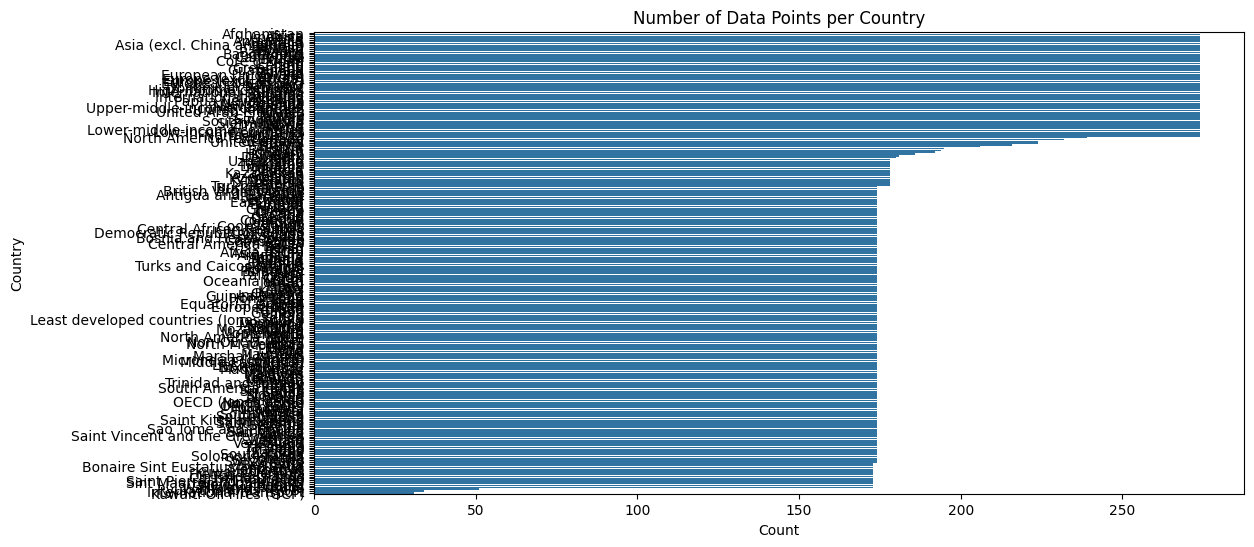

In [56]:
# Plot number of entries per country
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='country', order=df['country'].value_counts().index)
plt.title("Number of Data Points per Country")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

# CO2 EMISSION ANALYSIS

## Top 10 countries by total carbon emissions

In [57]:
top_countries = df_10years.groupby('country')['co2'].sum().sort_values(ascending = False).head(10)
print(top_countries)

country
Estonia              13673.113
Costa Rica           12266.672
Cote d'Ivoire        11282.971
Eritrea              11019.800
Cook Islands          9424.775
Equatorial Guinea     8437.815
Congo                 7158.314
El Salvador           6632.892
Comoros               5381.578
Egypt                 4403.767
Name: co2, dtype: float64


### Plot co2 over the years

C:\Users\Karshi Thavarajah\AppData\Local\Temp\ipykernel_4676\1626359332.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_10years, x='year', y='co2', hue='country',


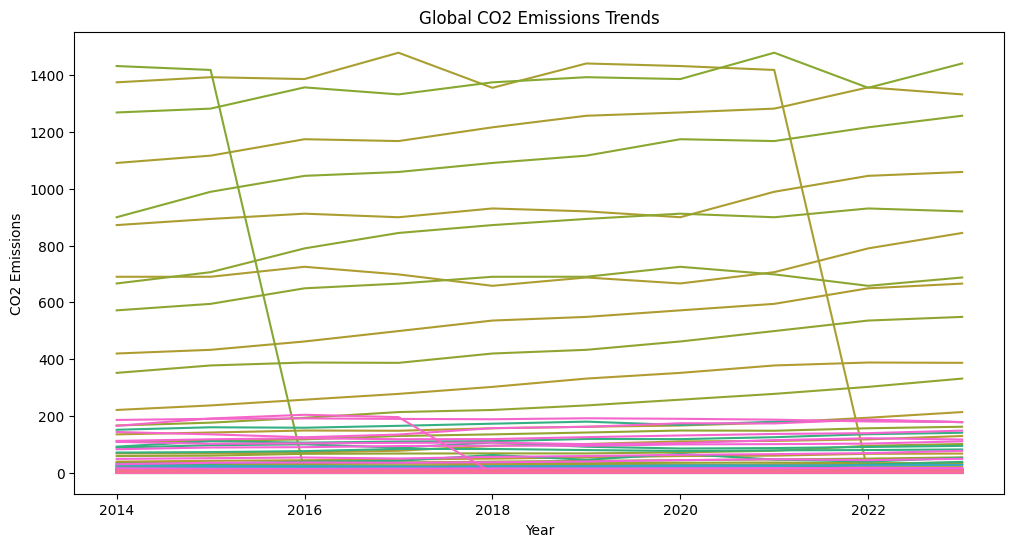

In [75]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_10years, x='year', y='co2', hue='country', 
             ci=None, estimator='mean', legend=False)
plt.title("Global CO2 Emissions Trends")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions")
# Save the plot to a file
plt.savefig('co2 over years', bbox_inches='tight')  # Save as PNG 
plt.show()

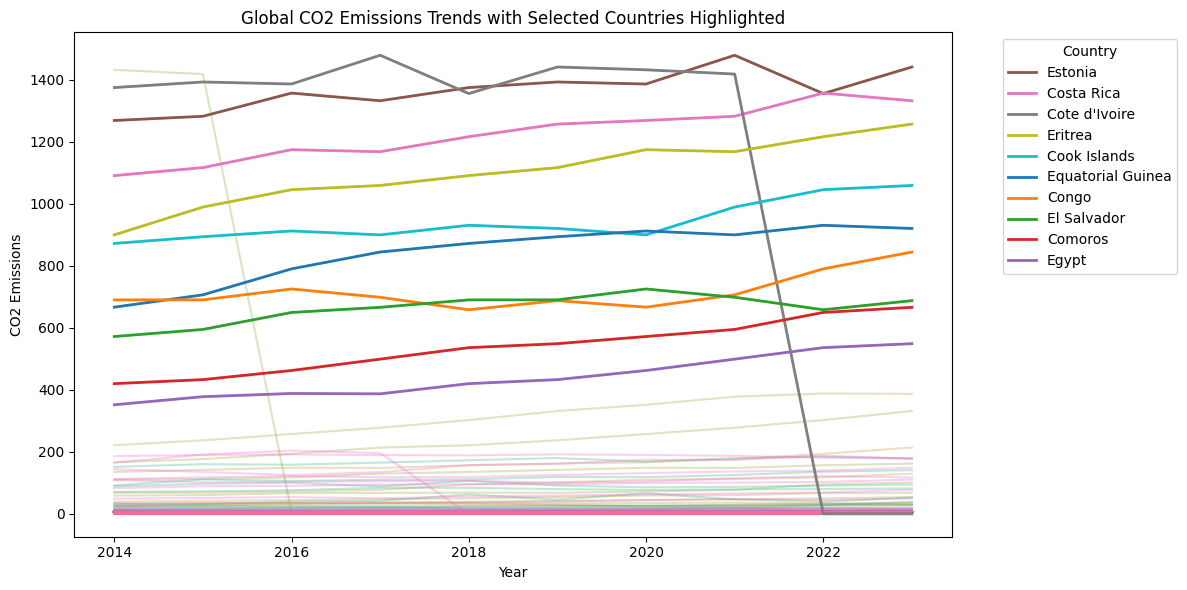

In [76]:
# List of countries to label
countries_to_label = [
    "Estonia", "Costa Rica", "Cote d'Ivoire", "Eritrea", "Cook Islands",
    "Equatorial Guinea", "Congo", "El Salvador", "Comoros", "Egypt"
]

# Filter the DataFrame for the countries to label
filtered_df = df_10years[df_10years['country'].isin(countries_to_label)]

# Plot all country trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_10years, x='year', y='co2', hue='country', alpha=0.3, legend=False)

# Plot the selected countries with labels
for country in countries_to_label:
    country_data = filtered_df[filtered_df['country'] == country]
    plt.plot(
        country_data['year'], country_data['co2'], label=country, linewidth=2
    )

# Add legend for labeled countries
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add title and labels
plt.title("Global CO2 Emissions Trends with Selected Countries Highlighted")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions")
plt.tight_layout()

plt.savefig('co2 emission trends top 10', bbox_inches='tight')  # Save as PNG 

# Show the plot
plt.show()

##  Per Capita Emissions Analysis

country
Qatar                        36.9091
Trinidad and Tobago          27.0676
Bahrain                      23.4388
United Arab Emirates         23.4245
Kuwait                       23.2385
Curacao                      22.9286
Brunei                       22.4005
Saudi Arabia                 21.1145
New Caledonia                18.4102
Sint Maarten (Dutch part)    17.5882
Name: co2_per_capita, dtype: float64


C:\Users\Karshi Thavarajah\AppData\Local\Temp\ipykernel_4676\3452369640.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_10years, x='year', y='co2_per_capita', hue='country',


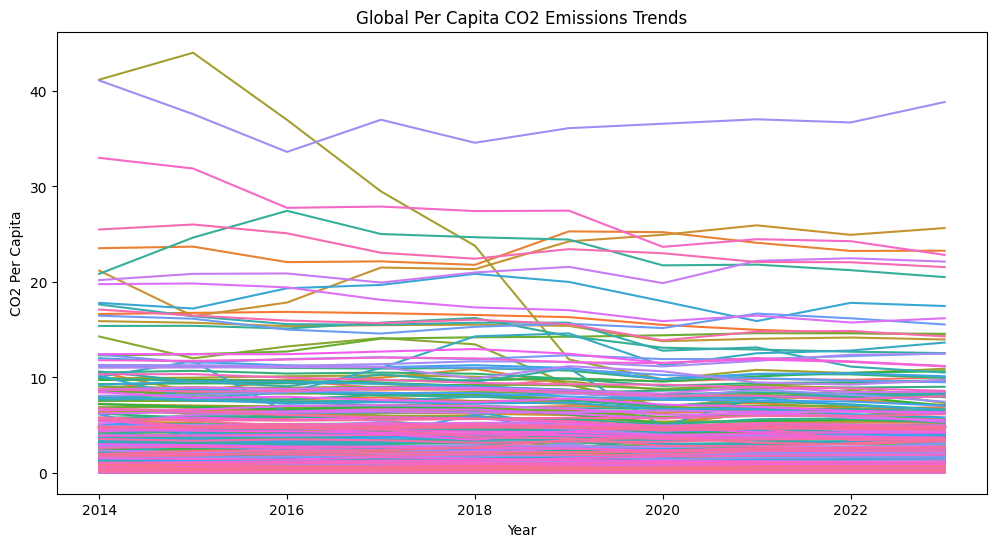

In [77]:
# Per capita CO2 emissions by country
top_per_capita = df_10years.groupby('country')['co2_per_capita'].mean().sort_values(ascending=False).head(10)
print(top_per_capita)

# Plot per capita emissions over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_10years, x='year', y='co2_per_capita', hue='country', 
             ci=None, estimator='mean', legend=False)
plt.title("Global Per Capita CO2 Emissions Trends")
plt.xlabel("Year")
plt.ylabel("CO2 Per Capita")
plt.savefig('Global Per Capita CO2 Emissions Trends', bbox_inches='tight')  # Save as PNG 
plt.show()

C:\Users\Karshi Thavarajah\AppData\Local\Temp\ipykernel_4676\2430708204.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_10years, x='year', y='co2_per_capita', hue='country',


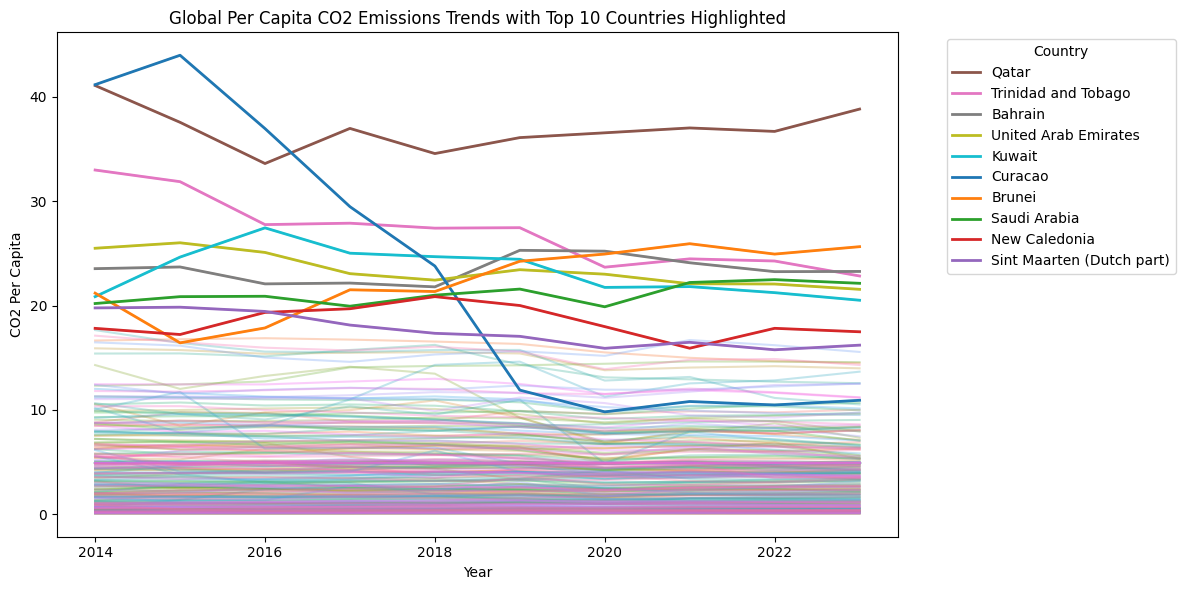

In [78]:
# Top 10 countries with highest per capita CO2 emissions
top_countries = [
    "Qatar", "Trinidad and Tobago", "Bahrain", "United Arab Emirates", "Kuwait",
    "Curacao", "Brunei", "Saudi Arabia", "New Caledonia", "Sint Maarten (Dutch part)"
]

# Filter the dataset for the top 10 countries
filtered_df = df_10years[df_10years['country'].isin(top_countries)]

# Plot overall per capita emissions trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_10years, x='year', y='co2_per_capita', hue='country', 
             alpha=0.3, ci=None, estimator='mean', legend=False)

# Plot and label top 10 countries
for country in top_countries:
    country_data = filtered_df[filtered_df['country'] == country]
    plt.plot(
        country_data['year'], country_data['co2_per_capita'], 
        label=country, linewidth=2
    )

# Add legend for labeled countries
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add title and labels
plt.title("Global Per Capita CO2 Emissions Trends with Top 10 Countries Highlighted")
plt.xlabel("Year")
plt.ylabel("CO2 Per Capita")
plt.tight_layout()

plt.savefig('Global Per Capita CO2 Emissions Trends with Top 10 Countries Highlighted', bbox_inches='tight')  # Save as PNG 
# Show the plot
plt.show()

## Energy Consumption and CO2

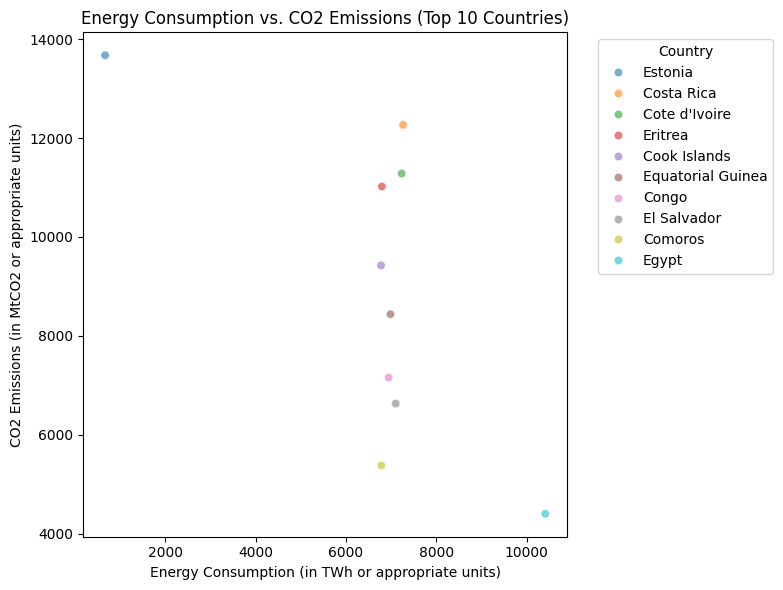

In [80]:
# Sort the data by CO2 emissions and select the top 10 highest emitting countries
top_10_emission_countries = df_10years.groupby('country').agg({'primary_energy_consumption': 'sum', 'co2': 'sum'}).sort_values('co2', ascending=False).head(10)

# Scatter plot of energy consumption vs. CO2 emissions
plt.figure(figsize=(8, 6))
sns.scatterplot(data=top_10_emission_countries, x='primary_energy_consumption', y='co2', hue=top_10_emission_countries.index, palette='tab10', alpha=0.6)
plt.title("Energy Consumption vs. CO2 Emissions (Top 10 Countries)")
plt.xlabel("Energy Consumption (in TWh or appropriate units)")
plt.ylabel("CO2 Emissions (in MtCO2 or appropriate units)")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Determine countries' contribution to global emissions.

In [67]:
# Calculate the global share of CO2 emissions
df['global_co2_share'] = (df['co2'] / df['co2'].sum()) * 100

# Top 10 countries by global share
top_global_share = df.groupby('country')['global_co2_share'].mean().sort_values(ascending=False).head(10)
print(top_global_share)

country
World                            0.054610
OECD (GCP)                       0.046496
Non-OECD (GCP)                   0.037147
High-income countries            0.034345
Europe (GCP)                     0.025803
Asia (GCP)                       0.024858
Upper-middle-income countries    0.023955
North America (GCP)              0.023177
China                            0.019231
Asia                             0.018128
Name: global_co2_share, dtype: float64


## Analyze the impact of emissions on temperature change.

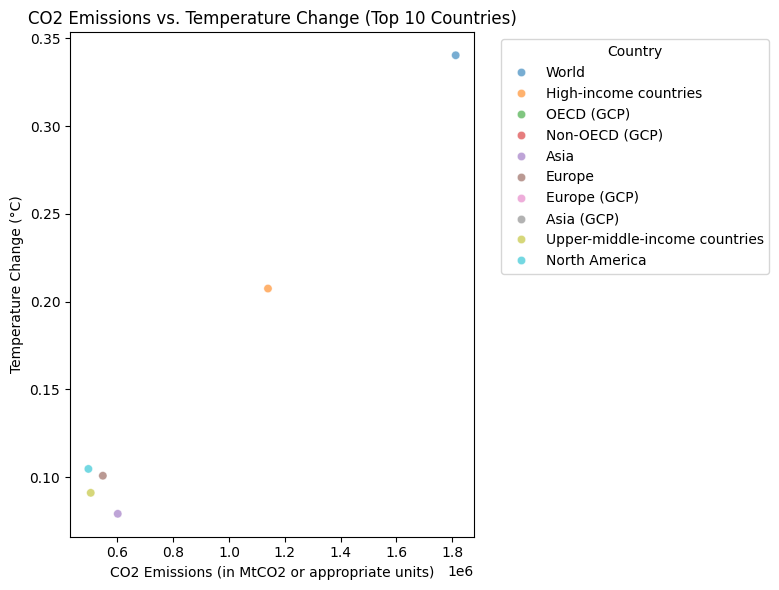

In [70]:
# Sort the data by CO2 emissions and select the top 10 highest emitting countries
top_10_emission_countries = df.groupby('country').agg({'co2': 'sum', 'temperature_change_from_co2': 'mean'}).sort_values('co2', ascending=False).head(10)

# Scatter plot of CO2 emissions vs. temperature change for top 10 countries
plt.figure(figsize=(8, 6))
sns.scatterplot(data=top_10_emission_countries, x='co2', y='temperature_change_from_co2', hue=top_10_emission_countries.index, palette='tab10', alpha=0.6)
plt.title("CO2 Emissions vs. Temperature Change (Top 10 Countries)")
plt.xlabel("CO2 Emissions (in MtCO2 or appropriate units)")
plt.ylabel("Temperature Change (°C)")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Time Series Analysis - Compare trends in CO2, GDP, and energy consumption over the years.

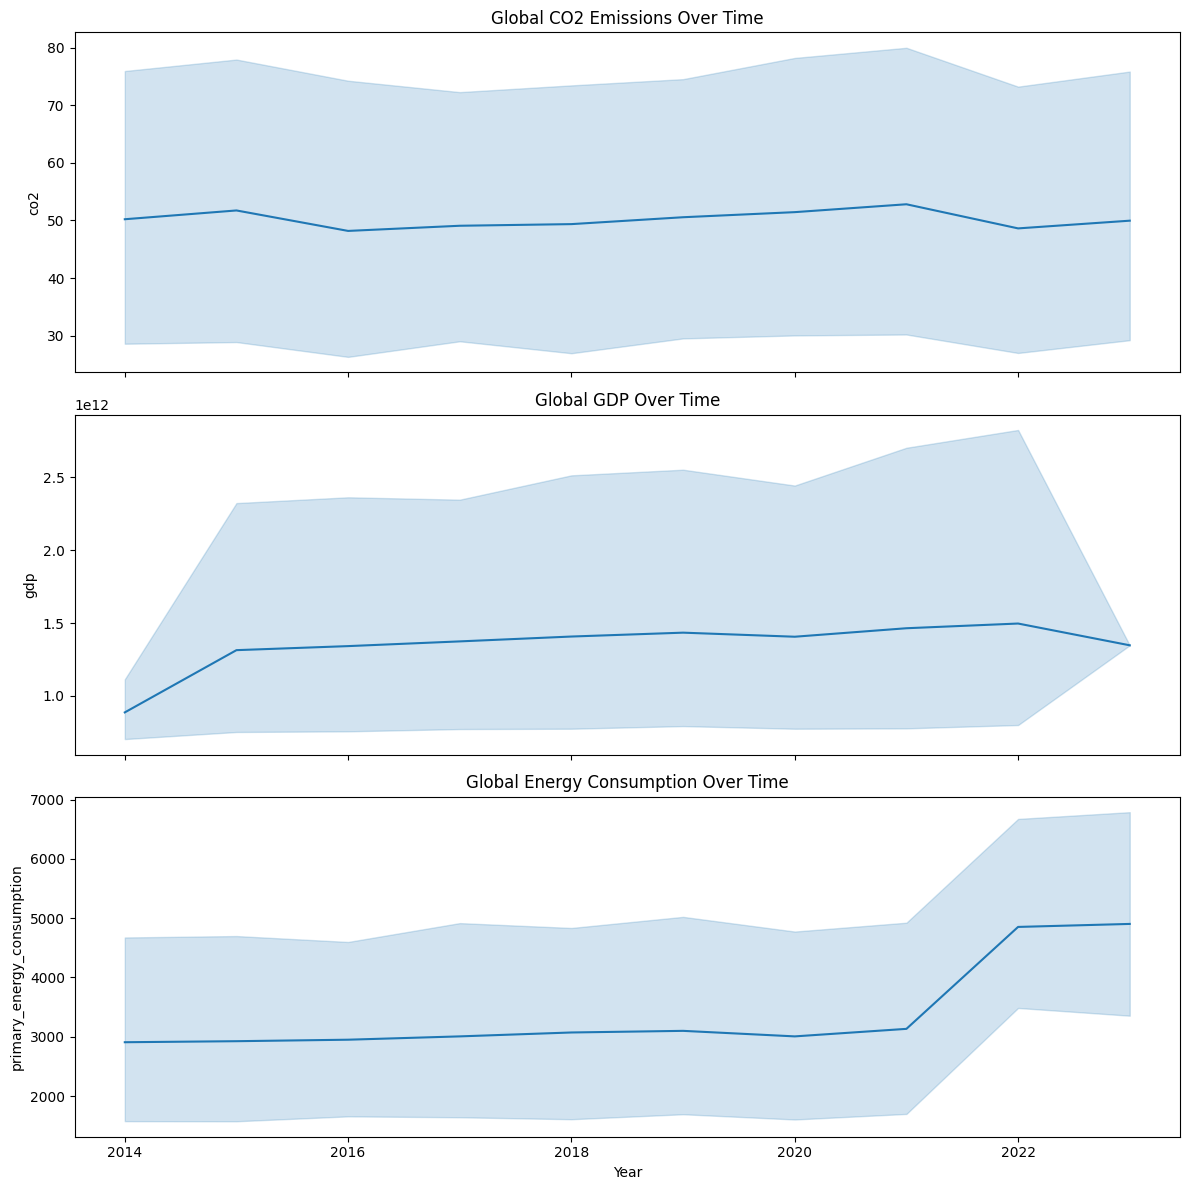

In [81]:
# Trends over time
fig, ax = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
sns.lineplot(data=df_10years, x='year', y='co2', ax=ax[0])
ax[0].set_title("Global CO2 Emissions Over Time")
sns.lineplot(data=df_10years, x='year', y='gdp', ax=ax[1])
ax[1].set_title("Global GDP Over Time")
sns.lineplot(data=df_10years, x='year', y='primary_energy_consumption', ax=ax[2])
ax[2].set_title("Global Energy Consumption Over Time")
plt.xlabel("Year")
plt.tight_layout()
plt.savefig('Time Series Analysis', bbox_inches='tight')  # Save as PNG
plt.show()

## Detect outliers in CO2 emissions and energy consumption.

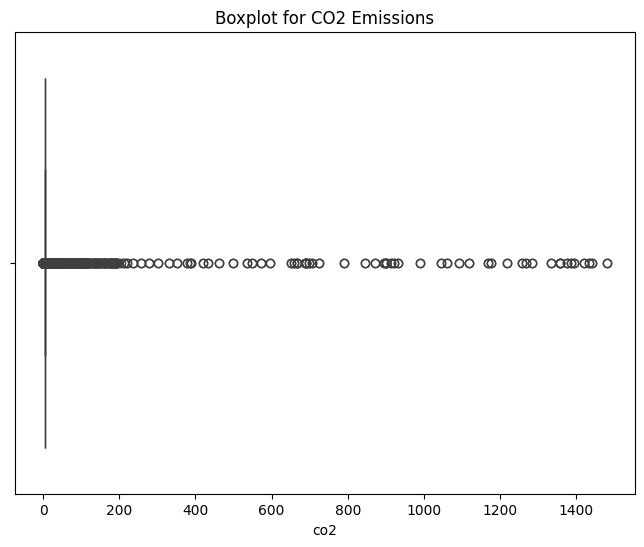

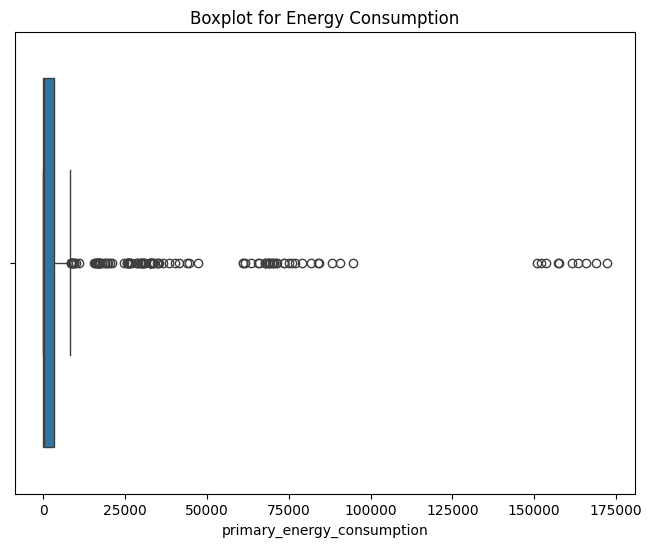

In [72]:
# Boxplot for CO2 emissions
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_10years, x='co2')
plt.title("Boxplot for CO2 Emissions")
plt.show()

# Boxplot for energy consumption
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_10years, x='primary_energy_consumption')
plt.title("Boxplot for Energy Consumption")
plt.show()